In [1]:
import sqlite3

# Connect to SQLite (creates sales_data.db if it doesn't exist)
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

In [2]:
# Create the sales table
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

In [4]:
# Insert some sample data
sample_data = [
    ("Product A", 10, 15.0),
    ("Product B", 5, 20.0),
    ("Product C", 8, 12.5),
    ("Product A", 4, 15.0),
    ("Product B", 7, 20.0),
    ("Product C", 3, 12.5),
    ("Product A", 2, 28.0), 
    ("Product B", 8, 22.0),
    ("Product C", 7, 19.0)
]

cursor.executemany("INSERT INTO sales VALUES (?, ?, ?)", sample_data)

conn.commit()
conn.close()

print("Database created with sample data!")

Database created with sample data!


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Connect to DB
conn = sqlite3.connect("sales_data.db")

In [6]:
# SQL query to get total quantity and revenue per product
query = """
SELECT 
    product, 
    SUM(quantity) AS total_qty, 
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""

In [7]:
# Load data into pandas DataFrame
df = pd.read_sql_query(query, conn)
conn.close()

In [8]:
# Display results
print("Sales Summary:")
print(df)

Sales Summary:
     product  total_qty  revenue
0  Product A         30    476.0
1  Product B         32    656.0
2  Product C         29    408.0


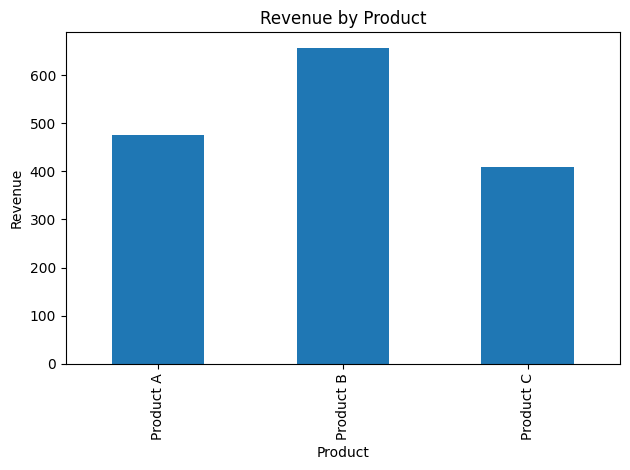

In [9]:
# Plot bar chart
df.plot(kind='bar', x='product', y='revenue', legend=False)
plt.title("Revenue by Product")
plt.ylabel("Revenue")
plt.xlabel("Product")
plt.tight_layout()
plt.savefig("sales_chart.png")
plt.show()